## Importing the Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("weather_classification_data.csv")

In [3]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
df.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


## Encoding categorical columns and Scaling the dataset

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [6]:
le_cloud_cover = LabelEncoder()
le_season = LabelEncoder()
le_location = LabelEncoder()
le_weather_type = LabelEncoder()

df['Cloud Cover'] = le_cloud_cover.fit_transform(df['Cloud Cover'])
df['Season'] = le_season.fit_transform(df['Season'])
df['Location'] = le_location.fit_transform(df['Location'])
df['Weather Type'] = le_weather_type.fit_transform(df['Weather Type'])

X = df.drop('Weather Type', axis=1)
y = df['Weather Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Building and Training the ANN

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [9]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [10]:
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation ='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(y_train_categorical.shape[1], activation= 'softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


231/231 [==============================] - 3s 6ms/step - loss: 0.6494 - accuracy: 0.7984 - val_loss: 0.4056 - val_accuracy: 0.8680
Epoch 2/50
231/231 [==============================] - 1s 5ms/step - loss: 0.3381 - accuracy: 0.8887 - val_loss: 0.3317 - val_accuracy: 0.8842
Epoch 3/50
231/231 [==============================] - 1s 4ms/step - loss: 0.2839 - accuracy: 0.8994 - val_loss: 0.3046 - val_accuracy: 0.8902
Epoch 4/50
231/231 [==============================] - 1s 4ms/step - loss: 0.2557 - accuracy: 0.9044 - val_loss: 0.2833 - val_accuracy: 0.8929
Epoch 5/50
231/231 [==============================] - 1s 4ms/step - loss: 0.2369 - accuracy: 0.9115 - val_loss: 0.2641 - val_accuracy: 0.8961
Epoch 6/50
231/231 [==============================] - 1s 4ms/step - loss: 0.2246 - accuracy: 0.9100 - val_loss: 0.2544 - val_accuracy: 0.8972
Epoch 7/50
231/231 [==============================] - 1s 5ms/step - loss: 0.2128 - accuracy: 0.9149 - val_loss: 0.2480 - val_accuracy: 0.8994
Epoc

## Moldel Evaluation and Confusion Matrix

In [13]:
model.evaluate(X_test, y_test_categorical)

124/124 [==============================] - 0s 3ms/step - loss: 0.2733 - accuracy: 0.9114


[0.27328038215637207, 0.9113636612892151]

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

124/124 [==============================] - 1s 3ms/step


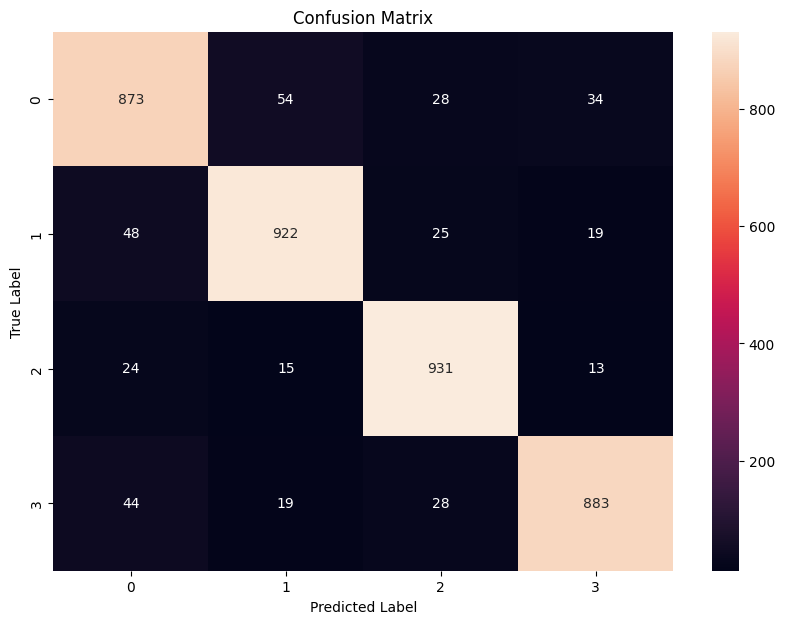

In [15]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()